# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement

The problem that we are trying to solve is how to predict the sale prices of a property using linear regression models.

## Executive Summary

The Ames Housing Dataset is a robust dataset comprising of over 2000 rows and 81 columns. The dataset was split into two, Train Dataset and Test Dataset. The Train Dataset is our hold-out dataset. To carry out this analysis, the following processes were undertaken.

1. Data Cleaning and Feature Engineering

    - This involved examining the data and looking for missing values for both the Train and Test Datasets.
    - Followed by feature classification, where we categorise the features based on their datatypes and analyse them separately.
    - Exploratory Data Analysis was conducted on the categorised features as well to look for features that were highly skewed, as well as outliers and/or peculiar data.
    - Outliers were identified and removed if deemed necessary
    - Muliticollinerity was identified amongst features and removed to prevent any form of penalisations to our models later.

2. Data Preprocessing

    - One hot encoding was done to our nominal features so that we can model them later. (Note: dummy variable trap was not taken care of
    - Ordinal and Categorical data were scaled thereafter
    - Train Test Split was conducted on our hold out set to train our data before predicting prices on the test dataset.

3. Modelling

    - Regression Models were created to identify the best model to predict prices. Lasso Regression Model held the lowest RMSE and hence is the best model
    
4. Kaggle

    - Model was implemented on Test Dataset and submitted to Kaggle. Kaggle score was turned out to be higher.

## Data Cleaning & Feature Engineering

### Starter Code and Importing Libraries

1. First and foremost, we are going to import all of the relevant libraries that we require to execute project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

2. For this project, we will be looking at two different datasets, train and test. So let us read these files first.

In [2]:
#import datasets
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

### Examine Data

We'll then examine the two datasets initally

First we will rename our columns for standardisation and clarity. We will create a function that can be used for other datasets as well.

In [3]:
#function to rename columns
def rename_cols(columns):
    columns = [x.lower().replace(' ', '_').replace('/', '_') for x in columns]
    return columns

In [4]:
#rename columns for both datasets
train.columns = rename_cols(train.columns)
test.columns = rename_cols(test.columns)

#### Train Dataset

Let's take a quick look at the distribution of sale prices first.

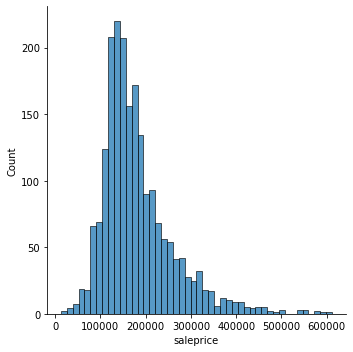

In [5]:
#quick displot to illustrate distribution of saleprices
sns.displot(train['saleprice']);

A quick overview shows that the distribution of the sale prices is not normal and skewed towards the right.

In [6]:
#examine the shape of the dataset
train.shape

(2051, 81)

In [7]:
#quick overview of the dataset
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
#view columns, datatypes and non-null count
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

#### Test Dataset

In [9]:
#examine the shape of the dataset
test.shape

(879, 80)

In [10]:
#quick overview of the dataset
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


    3.1 Initial Analysis and Observations
    
    Train Dataset
    
    There are 2051 rows and 81 columns, where 2051 represents the number of transactions. 
    
    Test Dataset
    
    There are 879 rows and 80 columns, where 879 represents the number of transactions. The column not present in the Test Dataset is the 'SalePrice' column, which is the dependent variable that we are predicting in this project. The number of transactions in the Test dataset also makes up for exactly 30% of the entire data (both Train and Test Datasets)

### Missing Values and Imputation

#### Train Dataset

First we will drop features that are incapable of predicting sale prices of properties such as unique IDs.

In [11]:
train.drop(columns = ['id', 'pid'], inplace = True)

Then we shall examine the null values in the train dataset.

In [12]:
#check for null values in train dataset
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
total_bsmt_sf        1
dtype: int64

There are 26 columns with null values, some with a significant number of null values. There are some columns with just 1 null values while others have 2000+. We will proceed to look at the columns to understand the reasons for the null values and decide if we want to keep these columns/drop any rows/make any changes to them.

###### Feature: pool_qc

There are 2042 missing values for the 'pool_qc' column, which refers to the pool quality. Pool quality can only be present if there is a pool. The missing values would mean that these transactions do not have any pools. Let us check for any erroneous data. 

In [13]:
#count rows where pool area = 0 and pool qc is null
len(train.loc[(train['pool_area'] == 0) | (train['pool_qc'].isna())])

2042

There is no erroneous data. There is an equal number of rows for both the 'pool_area' and 'pool_qc'. If there the property has no pool, there is no pool quality check as well.

Let us look compare the how the prices vary in properties that have a pool and those that do not.

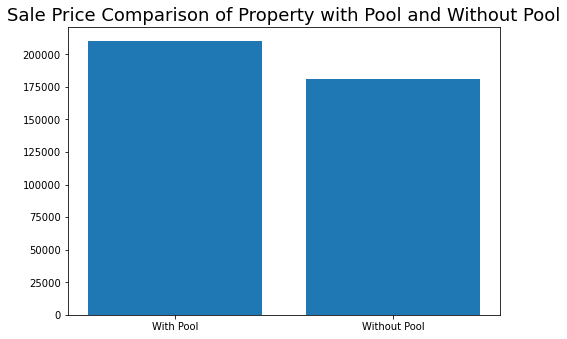

In [14]:
#We will plot a bar chart that compares the mean sale price of the two different types of properties
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
xaxis = ['With Pool', 'Without Pool']
yaxis = [train[train['pool_area'] !=0]['saleprice'].mean(), train[train['pool_area'] ==0]['saleprice'].mean()]
ax.bar(xaxis, yaxis)
ax.set_title("Sale Price Comparison of Property with Pool and Without Pool", fontsize = 18);
plt.show()

As seen from the bar chart above, the average price of a property with a pool is higher than that of a property without a pool, showing that having a pool does affect the price of properties.

Let us see if the quality of pool has any impact on properties. We will look at the values first.

In [15]:
#display unique values in pool_qc
train['pool_qc'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [16]:
#overview of pool_qc and saleprice
pool_quality = train.loc[train['pool_qc'].notnull(), ['pool_qc', 'saleprice']]
display(pool_quality)

,pool_qc,saleprice
52,Fa,250000
657,Gd,171000
761,Gd,260000
952,Ex,315000
960,Gd,160000
1130,Fa,181000
1249,Gd,274970
1635,TA,153000
1875,TA,130000


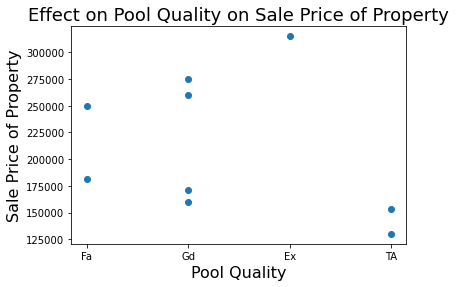

In [17]:
#simple scatter plot to see if there is any relationship between sale price and quality of pool
plt.scatter(pool_quality['pool_qc'], pool_quality['saleprice'])
plt.xlabel('Pool Quality', fontsize = 16)
plt.ylabel('Sale Price of Property', fontsize = 16)
plt.title("Effect on Pool Quality on Sale Price of Property", fontsize = 18);

Based on the simple scatter plot above, an excellent quality pool does seem to elevate the price of property, however, there are properties with good quality pools that have a similar price range than those with average and even fair quality pools. Hence we can conclude that the quality of the pool may not be a significant contributer to the sale price of a property. Additionally, with only 9 properties having a pool, we also do not have enough data to make any proper deductions of the relationship between quality of pool and sale price of house.

Hence, we will create a new column which specifies if the property has a pool or not, and then drop the 'Pool Area' and 'Pool QC' columns.

In [18]:
#create new column that holds value of 1 if pool present, otherwise 0
train['pool'] = train['pool_area'].map(lambda x: 0 if x == 0 else 1)

In [19]:
#drop pool_area and pool_qc columns
train.drop(columns = ['pool_area', 'pool_qc'], inplace = True)

###### Feature: misc_feature

In [20]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
total_bsmt_sf        1
dtype: int64

There are 1986 missing values for the 'misc_feature' column, which represents any other miscellaneous features that a property has which has not been already mentioned. We will look at how this column is categorised and proceed to understand if the miscellaneous features affect the price of a property has compared to those that do not have these features.

In [21]:
train['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

We will create a boxplot for comparison, but before we do that we will fill the null values for comparison with the miscellaneous features. Properties with no miscellaneous features will be filled with "NA".

In [22]:
#fill null values
train['misc_feature'].fillna(value = 'NA', inplace = True)

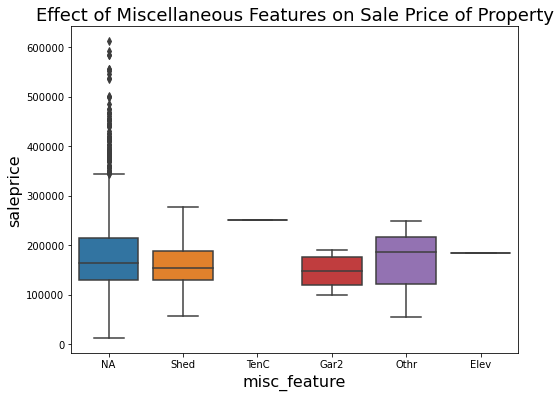

In [23]:
#to avoid repetitives, we shall create a boxplot function for single features at this stage, 
#which will be helpful in our data cleaning process.

def box_plot(x_col, y_col, palette):
    fig, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(x = x_col, y = y_col, data = train, ax=ax, palette = palette)
    plt.xlabel(x_col, fontsize = 16)
    plt.ylabel(y_col, fontsize = 16)
    
#boxplot
box_plot('misc_feature', 'saleprice', None)
plt.title("Effect of Miscellaneous Features on Sale Price of Property", fontsize = 18);

As seen from the boxplot, the sale prices of properties with miscellaneous features compare with those that do not have miscellaneous features at all as seen from the similar median sale price levels. However, the property with a tennis score has a higher median compared to everyone else. Since it is the only property with a tennis court, there is no evidence that tennis court indeed has a significant effect on sale price levels. Hence, we will also drop this column.

In [24]:
#drop misc_feature column
train.drop(columns = ['misc_feature'], inplace = True)

###### Feature: alley

In [25]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_qual        114
garage_cond        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
total_bsmt_sf        1
garage_area          1
bsmt_unf_sf          1
dtype: int64

There are 1911 missing values in this column. Let us look at how this column is categorised and proceed to see the relationship between the column and the sale price of properties.

In [26]:
train['alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [27]:
train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [28]:
#percentage of null values
percentage = 1911/2051 *100
percentage

93.1740614334471

We will create a boxplot for comparison and similarly fill the null values for comparison with properties that do not have an alley. The null values will be filled with "NA".

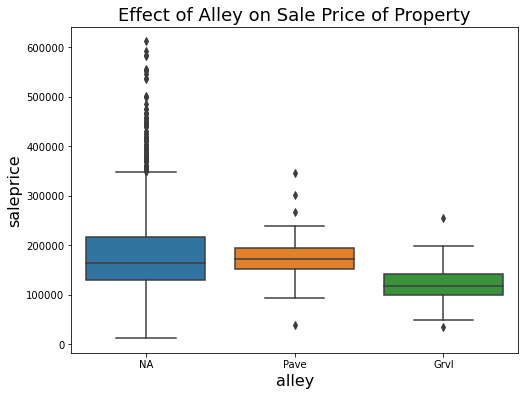

In [29]:
#fill null values
train['alley'].fillna(value = 'NA', inplace = True)


#boxplot
box_plot('alley', 'saleprice', None)
plt.title("Effect of Alley on Sale Price of Property", fontsize = 18);

Based on the boxplot, it seems that properties with gravel alleys have lower sale prices, as seen with the lower median value and properties with paved alleys have similar sale prices than those that do not have access to alleys at all. However, there are 93.2% properties that do not have access to alleys at all. Hence, it is not an efficient predictor of sale price. We will proceed to drop this column as well.

In [30]:
#drop alley column
train.drop(columns = ['alley'], inplace = True)

###### Feature: fence

In [31]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_yr_blt      114
garage_qual        114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
bsmt_unf_sf          1
total_bsmt_sf        1
dtype: int64

The 'fence' column has 1651 null values and we will learn how its relationship varies with sale price of properties.

In [32]:
train['fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [33]:
#percentage of null values
percentage = 1651/2051 *100
percentage

80.49731838127742

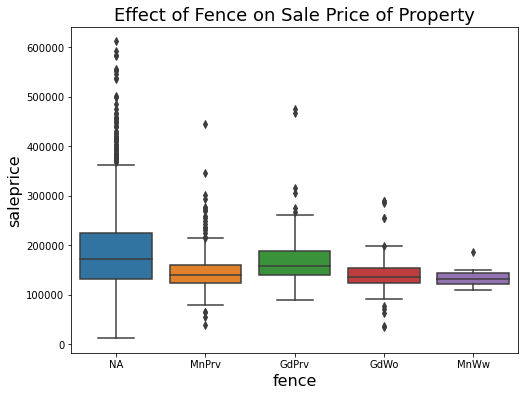

In [34]:
#fill null values
train['fence'].fillna(value = 'NA', inplace = True)


#boxplot
box_plot('fence', 'saleprice', None)
plt.title("Effect of Fence on Sale Price of Property", fontsize = 18);

As seen in the boxplot plotted, properties with fences that provide good privacy do tend to have higher sale prices than those with minimum privacy, however their sale prices are similar with properties that have no fences at all. Moreover, there seems to be not much difference in price for the type of wood used for fences. Overall, this is not a good indicator of sale prices as 80% of properties do not have a fence, and we will drop this column as well.

In [35]:
#drop fence column
train.drop(columns = ['fence'], inplace = True)

###### Feature: fireplace_qu

In [36]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_qual        114
garage_cond        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_full_bath       2
bsmt_half_bath       2
total_bsmt_sf        1
garage_area          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
bsmt_unf_sf          1
dtype: int64

'Fireplace Qu' has 1000 null values and makes up almost 50% of the dataset. As 'fireplace_qu' looks into the quality of a fireplace, this column is dependent on the 'Fireplaces' column, as there can only be a value for 'Fireplace Qu' if there is a fireplace. So let us check for erroneous data between these columns.

In [37]:
len(train.loc[train['fireplaces'] == 0])

1000

In [38]:
len(train.loc[(train['fireplaces'] == 0) | (train['fireplace_qu'].isna())])

1000

There is no erroneous data. All the null values in 'Fireplace Qu' correspond to the value 0 in 'Fireplaces'.

Let us look at how these columns affect sale prices.

In [39]:
train['fireplaces'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [40]:
train['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

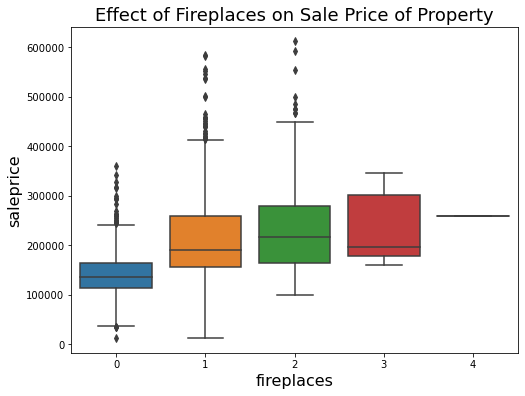

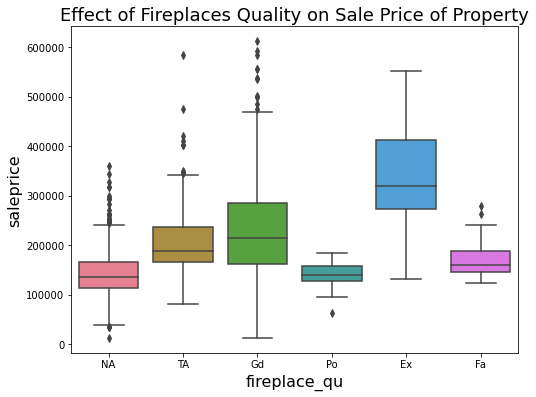

In [41]:
#fill null values
train['fireplace_qu'].fillna(value = 'NA', inplace = True)


#boxplot for Fireplaces
box_plot('fireplaces', 'saleprice', None)
plt.title("Effect of Fireplaces on Sale Price of Property", fontsize = 18);

#boxplot for Fireplaces Quality
plot = box_plot('fireplace_qu', 'saleprice', 'husl')
plt.title("Effect of Fireplaces Quality on Sale Price of Property", fontsize = 18);

When we compare the number of fireplaces to the sale price of properties, we see a clear trend whereby the sale price increases as the number of fireplaces increases. Similarly, we see quality of fireplaces affecting sale prices as well. As such, we will keep these columns.

###### Feature: lot_frontage

In [42]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

lot_frontage      330
garage_finish     114
garage_qual       114
garage_yr_blt     114
garage_cond       114
garage_type       113
bsmt_exposure      58
bsmtfin_type_2     56
bsmtfin_type_1     55
bsmt_cond          55
bsmt_qual          55
mas_vnr_area       22
mas_vnr_type       22
bsmt_half_bath      2
bsmt_full_bath      2
garage_cars         1
total_bsmt_sf       1
garage_area         1
bsmtfin_sf_2        1
bsmtfin_sf_1        1
bsmt_unf_sf         1
dtype: int64

There are 330 missing values for lot_frontage. Let us dive deeper into that.

In [43]:
train.lot_frontage.unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [44]:
#correlation between lot_frontage and saleprice
train['lot_frontage'].corr(train['saleprice'])

0.3418424837268713

Based on the data dictionary, the 'lot_frontage' feature refers to the linear distance of the street that is connected to the property measured in feet. Hence, a null value means that there is no street connected to the property. However, there is also a weak positive correlation between properties with streets connected to properties with sale prices. Since it appears to be not a good indicator of price, we will drop this feature as well.

In [45]:
#drop lot_frontage
train.drop(columns = ['lot_frontage'], inplace = True)

###### Feature: garage Type

In [46]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

garage_cond       114
garage_finish     114
garage_yr_blt     114
garage_qual       114
garage_type       113
bsmt_exposure      58
bsmtfin_type_2     56
bsmt_qual          55
bsmt_cond          55
bsmtfin_type_1     55
mas_vnr_area       22
mas_vnr_type       22
bsmt_full_bath      2
bsmt_half_bath      2
bsmtfin_sf_2        1
bsmtfin_sf_1        1
total_bsmt_sf       1
garage_cars         1
garage_area         1
bsmt_unf_sf         1
dtype: int64

For all the garage type features, there seems to be a consistent number of missing values except for one column 'garage_type'. Let us take a look at that. 

In [47]:
train.loc[(train['garage_finish'].isna()) & (train['garage_type'].notna()), 
          train.columns.str.contains("garage")]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


There are five columns that verify that a property does not have a garage, namely, 'garage_area',  'garage_type', 'garage_finish', 'garage_qual' and 'garage_cond'. Since both of these columns hold null values, this confirms the value in 'garage_type' is erroneous and can be removed. With that we will fill all null values.

In [48]:
#change 'detchd' to 'NA'
train.loc[train.index == 1712, 'garage_type'] = 'NA'

Additionally, it appears that this is the same row with a null value for 'garage_area' and 'garage_cars'. We shall fix that as well.

In [49]:
train.loc[train.index == 1712, ('garage_area', 'garage_cars')] = '0'

Let us check if there is consistency amongst the remaining rows with null values in garage type features.

In [50]:
len(train.loc[(train['garage_qual'].isna()) | (train['garage_cond'].isna())|\
              (train['garage_finish'].isna()) | (train['garage_type'].isna()) | (train['garage_area'] == 0)])
   

114

There seems to be consistency, hence we will fill in the null values in these columns.

In [51]:
#fill in null values for Garage Type Features
train['garage_yr_blt'].fillna(value = 0, inplace = True)
train['garage_qual'].fillna(value = 'NA', inplace = True)
train['garage_cond'].fillna(value = 'NA', inplace = True)
train['garage_finish'].fillna(value = 'NA', inplace = True)
train['garage_type'].fillna(value = 'NA', inplace = True)

Let us change the datatype for garage_yr_blt,garage_area and garage_cars

In [52]:
#update datatype
train['garage_yr_blt'] = train['garage_yr_blt'].astype(int)
train['garage_area'] = train['garage_area'].astype(float)
train['garage_cars'] = train['garage_cars'].astype(int)

###### Feature: bsmt (basement) Type

In [53]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

bsmt_exposure     58
bsmtfin_type_2    56
bsmtfin_type_1    55
bsmt_cond         55
bsmt_qual         55
mas_vnr_area      22
mas_vnr_type      22
bsmt_half_bath     2
bsmt_full_bath     2
total_bsmt_sf      1
bsmt_unf_sf        1
bsmtfin_sf_2       1
bsmtfin_sf_1       1
dtype: int64

There also seems to be a slight similarity between the number of null values in the basement Type features. There are multiple columns having ability to verify that a property has no basement. This means there are a few rows with erroneous values. Let's dig into them.

In [54]:
train.loc[((train['bsmt_exposure'].isna()) & (train['bsmt_qual'].notna())) |\
          ((train['bsmtfin_type_2'].isna()) & (train['bsmt_qual'].notna())), 
          train.columns.str.contains("bsmt")]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


There are 3 properties that have null values for 'bsmt_exposure' but have data for the total square feet of the basement area, showcasing that these properties indeed have a basement. Hence the null values would simply represent having no exposure. Let's fix that right away.

In [55]:
#update row values
train.loc[train.index == 1456, 'bsmt_exposure'] = 'No'
train.loc[train.index == 1547, 'bsmt_exposure'] = 'No'
train.loc[train.index == 1997, 'bsmt_exposure'] = 'No'

Additionally, for index 1147, there is a null value in the 'bsmtfin_type_2' column which is erroneous as the property does have a basement. However, since the value in 'bsmt_unf_sf' is more than 0, the basement is unfinished. Hence, the null value will be replaced with 'Unf'.

In [56]:
#update index 1147
train.loc[train.index == 1147, 'bsmtfin_type_2'] = 'Unf'

Let us check if there is consistency amongst the remaining rows with null values in Garage type features.

In [57]:
len(train.loc[(train['bsmt_exposure'].isna()) | (train['bsmtfin_type_2'].isna())| (train['bsmtfin_type_1'].isna()) |\
              (train['bsmt_cond'].isna()) | (train['bsmt_qual'].isna())| (train['total_bsmt_sf'] == 0)])

55

All the missing values correspond to properties that have 0 total basement area in square feet. Now we will fill the null values in all the relevant Basement type features.

In [58]:
#fillna values in columns
train['bsmt_exposure'].fillna(value = 'NA', inplace = True)
train['bsmtfin_type_2'].fillna(value = 'NA', inplace = True)
train['bsmtfin_type_1'].fillna(value = 'NA', inplace = True)
train['bsmt_cond'].fillna(value = 'NA', inplace = True)
train['bsmt_qual'].fillna(value = 'NA', inplace = True)

###### Feature: mas (masonry) Type

In [59]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

mas_vnr_area      22
mas_vnr_type      22
bsmt_half_bath     2
bsmt_full_bath     2
total_bsmt_sf      1
bsmt_unf_sf        1
bsmtfin_sf_2       1
bsmtfin_sf_1       1
dtype: int64

Both Masonry type features have the same number of null values, so let's see if there is any form of correspondence.

In [60]:
len(train.loc[(train['mas_vnr_area'].isna()) | (train['mas_vnr_type'].isna())])

22

It appears that the missing values in the 'Mas Vnr Area' and 'Mas Vnr Type' columns do correspond to each other. So let us take a look at the null values in these columns. So we will clean up these columns first.

In [61]:
#fill in null values
train['mas_vnr_area'].fillna(value = 0, inplace = True)
train['mas_vnr_type'].fillna(value = 'None', inplace = True)

###### Features: bsmt_bath Type

There are two rows with null values in columns 'Bsmt Half Bath' and 'Bsmt Full Bath'. 

In [62]:
train.loc[(train['bsmt_half_bath'].isna()) & (train['bsmt_full_bath'].isna()),
          train.columns.str.contains("bsmt")]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN
1327,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN


The null values correspond to other Basement type features containing null values, implying that the properties do not have a basement. Hence we will fill the null values, along with other columns that have null values.

In [63]:
#for index = 1327
train.loc[train.index == 1327, ('bsmt_half_bath', 'bsmt_full_bath', 'bsmt_unf_sf', 
          'total_bsmt_sf', 'bsmtfin_sf_2', 'bsmtfin_sf_1')] = 0

#for index = 616
train.loc[train.index == 616, ('bsmt_half_bath', 'bsmt_full_bath')] = 0

In [64]:
#convert datatypes
train['bsmt_full_bath'] = train['bsmt_full_bath'].astype(int)
train['bsmt_half_bath'] = train['bsmt_half_bath'].astype(int)

Let's do a quick check.

In [65]:
#overview of null values presently
train[train.columns[train.isnull().any()]].isnull().sum().sort_values(ascending = False)

Series([], dtype: float64)

We have successfully eliminated all null values in the train dataset

#### Test Dataset

Let us drop the columns in the test data set as we did in the train set.

In [66]:
#add pool and drop pool_area, pool_qc
test['pool'] = test['pool_area'].map(lambda x: 0 if x == 0 else 1)
test.drop(columns = ['pool_area', 'pool_qc'], inplace = True)

In [67]:
#find different columns between test and data 
diff_columns = set(test.columns).difference(set(train.columns))
#drop columns that are not in train
test.drop(columns = diff_columns, inplace = True)

For the test dataset, we are not going to manipulate any data. We are only going to fill null values.

In [68]:
test[test.columns[test.isnull().any()]].isnull().sum().sort_values(ascending = False)

fireplace_qu      422
garage_cond        45
garage_qual        45
garage_finish      45
garage_yr_blt      45
garage_type        44
bsmtfin_type_2     25
bsmtfin_type_1     25
bsmt_exposure      25
bsmt_cond          25
bsmt_qual          25
electrical          1
mas_vnr_area        1
mas_vnr_type        1
dtype: int64

In [69]:
test['mas_vnr_area'].fillna(value = 0, inplace = True)
test['mas_vnr_type'].fillna(value = 'None', inplace = True)
test['garage_type'].fillna(value = 'NA', inplace = True)

### Feature Classification

We are going to analyse features based on the type of variables they are. We will split them into 4 categories first i.e. discrete, continous, nominal and ordinal.

#### Graph Functions

In [70]:
#scatterplot
def subplot_scatter(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize = (15, nrows*3.5), sharex=False, sharey=True)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(x = df[column], y = df.saleprice, ax = ax[i], line_kws={'color': 'red'}) 
        ax[i].set_title(column,fontsize=18)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=12)
        ax[i].set_ylabel('saleprice', fontsize=12)
    plt.tight_layout()


#boxplot
def subplot_boxplot(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize = (15, nrows*3.5), sharex=False, sharey=True)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = df[column], y = df.saleprice, ax = ax[i]) 
        ax[i].set_title(column,fontsize=18)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=12)
    plt.tight_layout()


#histogram
def subplot_hist(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(df[column],bins=15)
        ax[i].set_title(f'{column} distribution',fontsize=18)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=12)
    plt.tight_layout()

#### Classification

###### Discrete

In [71]:
#list to store discrete features
discrete_feat = ['year_built',
            'year_remod_add',
            'bsmt_full_bath',
            'bsmt_half_bath',
            'full_bath',
            'half_bath',
            'bedroom_abvgr',
            'kitchen_abvgr',
            'totrms_abvgrd',
            'fireplaces',
            'garage_yr_blt',
            'garage_cars',
            'mo_sold',
            'yr_sold'
]

###### Continuous

In [72]:
#list to store continuous features
continuous_feat = ['lot_area',
                   'mas_vnr_area',
                   'bsmtfin_sf_1',
                   'bsmtfin_sf_2',
                   'bsmt_unf_sf',
                   'total_bsmt_sf',
                   '1st_flr_sf',
                   '2nd_flr_sf',
                   'low_qual_fin_sf',
                   'gr_liv_area',
                   'garage_area',
                   'wood_deck_sf',
                   'open_porch_sf',
                   'enclosed_porch',
                   '3ssn_porch',
                   'screen_porch',
                   'misc_val'
]

###### Nominal

In [73]:
#list to store nominal features
nominal_feat = ['ms_subclass',
                'ms_zoning',
                'street',
                'land_contour',
                'lot_config',
                'neighborhood',
                'condition_1',
                'condition_2',
                'bldg_type',
                'house_style',
                'roof_style',
                'roof_matl',
                'exterior_1st',
                'exterior_2nd',
                'mas_vnr_type',
                'foundation',
                'heating',
                'central_air',
                'sale_type',
                'garage_type',
                'pool'
]

###### Ordinal

In [74]:
#list to store ordinal features
ordinal_feat = ['lot_shape',
                'utilities',
                'land_slope',
                'overall_qual',
                'overall_cond',
                'exter_qual',
                'exter_cond',
                'bsmt_qual',
                'bsmt_cond',
                'bsmt_exposure',
                'bsmtfin_type_1',
                'bsmtfin_type_2',
                'heating_qc',
                'electrical',
                'kitchen_qual',
                'fireplace_qu',
                'garage_finish',
                'garage_qual',
                'garage_cond',
                'paved_drive',
                'functional'
]

Let us look at the discrete features first and see if we can classify them better.

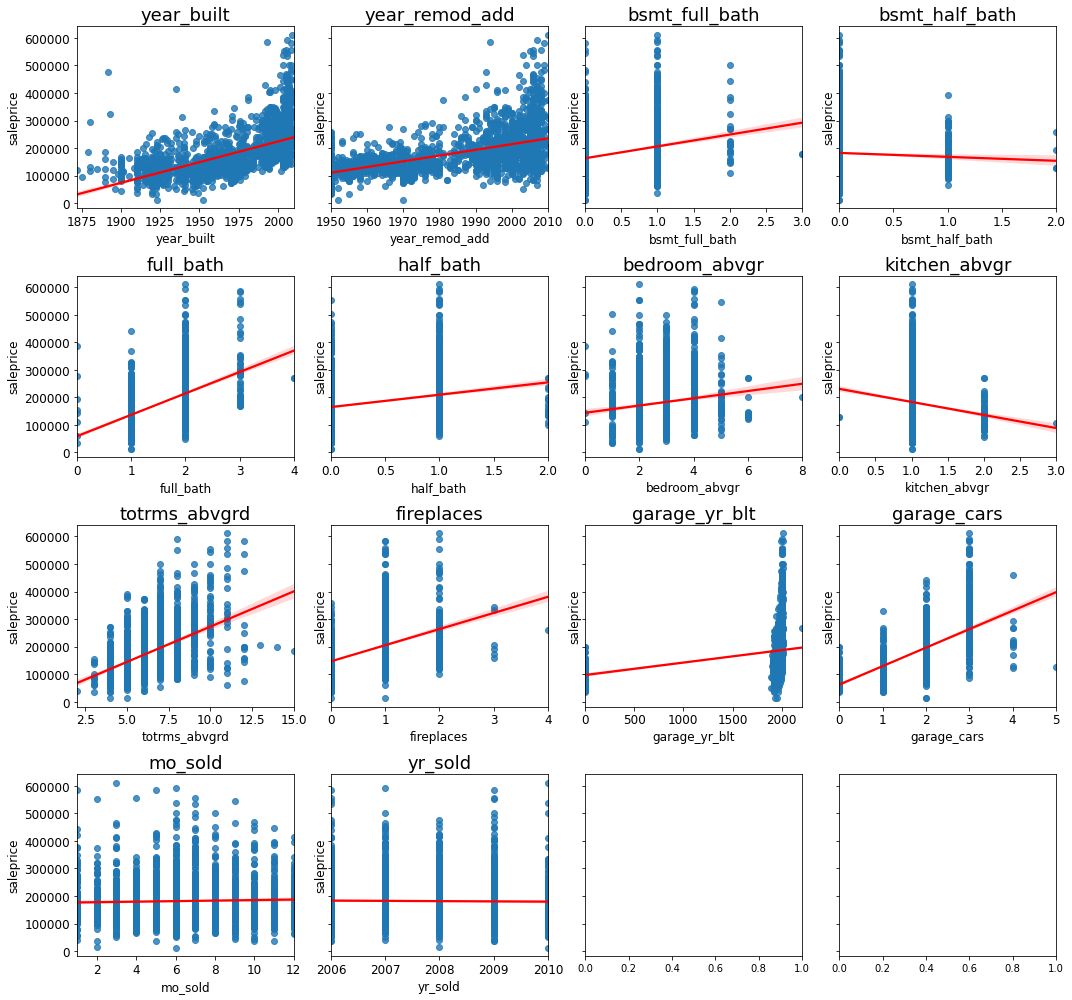

In [75]:
subplot_scatter(train, discrete_feat)

Based on the regression plots above, it appears that 'mo_sold' and 'yr_sold' have no linear relationship with sale prices, hence we will add them to the nominal features list.


'year_built', 'year_remod_add', 'garage_yr_blt' appear to be continous, hence we will add them to the continous features list.

The remaining features have a linear relationship with price, whether weak or strong and evidently display ordinal characteristics, therefore we will add them to the ordinal features list.

In [76]:
#update continous, nominal and ordinal feature lists
continuous_feat.extend(['year_built', 'year_remod_add', 'garage_yr_blt'])
nominal_feat.extend(['mo_sold', 'yr_sold'])
ordinal_feat.extend(['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
                'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars'])

###### Reclassifying Ordinal Types

FILLLLLL
We will map the ordinal features numerically from 0 onwards, where 0 is the worst

In [77]:
#view all unique values for each column in ordinal features list
for feature in ordinal_feat:
    print(f'{feature}: {train[feature].unique()}')

lot_shape: ['IR1' 'Reg' 'IR2' 'IR3']
utilities: ['AllPub' 'NoSeWa' 'NoSewr']
land_slope: ['Gtl' 'Sev' 'Mod']
overall_qual: [ 6  7  5  8 10  4  9  3  2  1]
overall_cond: [8 5 7 6 3 9 2 4 1]
exter_qual: ['Gd' 'TA' 'Ex' 'Fa']
exter_cond: ['TA' 'Gd' 'Fa' 'Ex' 'Po']
bsmt_qual: ['TA' 'Gd' 'Fa' 'NA' 'Ex' 'Po']
bsmt_cond: ['TA' 'Gd' 'NA' 'Fa' 'Po' 'Ex']
bsmt_exposure: ['No' 'Gd' 'Av' 'NA' 'Mn']
bsmtfin_type_1: ['GLQ' 'Unf' 'ALQ' 'Rec' 'NA' 'BLQ' 'LwQ']
bsmtfin_type_2: ['Unf' 'Rec' 'NA' 'BLQ' 'GLQ' 'LwQ' 'ALQ']
heating_qc: ['Ex' 'TA' 'Gd' 'Fa' 'Po']
electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
kitchen_qual: ['Gd' 'TA' 'Fa' 'Ex']
fireplace_qu: ['NA' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
garage_finish: ['RFn' 'Unf' 'Fin' 'NA']
garage_qual: ['TA' 'Fa' 'NA' 'Gd' 'Ex' 'Po']
garage_cond: ['TA' 'Fa' 'NA' 'Po' 'Gd' 'Ex']
paved_drive: ['Y' 'N' 'P']
functional: ['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
bsmt_full_bath: [0 1 2 3]
bsmt_half_bath: [0 1 2]
full_bath: [2 1 3 0 4]
half_bath: [1 0 2]
bedr

The features 'overall_qual' and 'overall_cond' hold numerical values, so we do not need to map them.

bsmt_qual, bsmt_cond, heating_qc, fireplace_qu, garage_qual, garage_cond appear to have a similar order. We will map them together. Let's store them in a list first.

In [78]:
#store similar ordered columns in same list
feat_1 = ['bsmt_qual', 'bsmt_cond', 'heating_qc', 'fireplace_qu', 'garage_qual', 'garage_cond',
         'exter_qual', 'exter_cond', 'kitchen_qual' ]

In [79]:
#function to map values for ordinal features
temp = {'NA': 0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
def ordinal_map(df, map_list, dictionary):
    for column in map_list:
        df[column] = df[column].replace(dictionary)

In [80]:
#map the values in columns in feat_1 list in train dataset
ordinal_map(train, feat_1, temp)

For the remaining columns we will have to do them individually.

In [81]:
#lot_shape
lot_dict = {'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
train['lot_shape'] = train['lot_shape'].replace(lot_dict)         

#utilities
util_dict = {'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3}
train['utilities'] = train['utilities'].replace(util_dict)               

#land_slope
slope_dict = {'Gtl':0, 'Mod':1, 'Sev':2 }
train['land_slope'] = train['land_slope'].replace(slope_dict)               

#bsmt_exposure
expo_dict = {'NA':0,'No':1, 'Mn':2, 'Av': 3, 'Gd':4}
train['bsmt_exposure'] = train['bsmt_exposure'].replace(expo_dict)  

#bsmtfin_type_1
type1_dict = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ': 5, 'GLQ':6}
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].replace(type1_dict)

#bsmtfin_type_2
type2_dict = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ': 5, 'GLQ':6}
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].replace(type2_dict) 

#electrical
elec_dict= {'Mix':0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3,'SBrkr':4} 
train['electrical'] = train['electrical'].replace(elec_dict)   

#paved_drive
paved_dict = {'N':0, 'P':1, 'Y':2 }
train['paved_drive'] = train['paved_drive'].replace(paved_dict) 

#garage_finish
gfinish_dict = {'NA':0, 'Unf':1, 'RFn':2,'Fin':3}
train['garage_finish'] = train['garage_finish'].replace(gfinish_dict) 

#functional
func_dict = {'Sal': 0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1': 6, 'Typ':7}
train['functional'] = train['functional'].replace(func_dict)

Let us do a quick check.

In [82]:
for feature in ordinal_feat:
    print(f'{feature}: {train[feature].unique()}')

lot_shape: [2 3 1 0]
utilities: [3 1 2]
land_slope: [0 2 1]
overall_qual: [ 6  7  5  8 10  4  9  3  2  1]
overall_cond: [8 5 7 6 3 9 2 4 1]
exter_qual: [4 3 5 2]
exter_cond: [3 4 2 5 1]
bsmt_qual: [3 4 2 0 5 1]
bsmt_cond: [3 4 0 2 1 5]
bsmt_exposure: [1 4 3 0 2]
bsmtfin_type_1: [6 1 5 3 0 4 2]
bsmtfin_type_2: [1 3 0 4 6 2 5]
heating_qc: [5 3 4 2 1]
electrical: [4 2 3 1 0]
kitchen_qual: [4 3 2 5]
fireplace_qu: [0 3 4 1 5 2]
garage_finish: [2 1 3 0]
garage_qual: [3 2 0 4 5 1]
garage_cond: [3 2 0 1 4 5]
paved_drive: [2 0 1]
functional: [7 4 5 3 6 1 0 2]
bsmt_full_bath: [0 1 2 3]
bsmt_half_bath: [0 1 2]
full_bath: [2 1 3 0 4]
half_bath: [1 0 2]
bedroom_abvgr: [3 4 2 5 1 0 6 8]
kitchen_abvgr: [1 2 0 3]
totrms_abvgrd: [ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]
fireplaces: [0 1 2 4 3]
garage_cars: [2 1 3 0 4 5]


Let us repeat the same steps for the Test Dataset.

In [83]:
#map the values in columns in feat_1 list in test dataset
temp2 = {np.nan: 0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ordinal_map(test, feat_1, temp2)

In [84]:
#test dataset
#lot_shape
test['lot_shape'] = test['lot_shape'].replace(lot_dict)         

#utilities
test['utilities'] = test['utilities'].replace(util_dict)               

#land_slope
test['land_slope'] = test['land_slope'].replace(slope_dict)               

#bsmt_exposure
expo_dict = {np.nan:0,'No':1, 'Mn':2, 'Av': 3, 'Gd':4}
test['bsmt_exposure'] = test['bsmt_exposure'].replace(expo_dict)  

#bsmtfin_type_1
type1_dict = {np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ': 5, 'GLQ':6}
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].replace(type1_dict)

#bsmtfin_type_2
type2_dict = {np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ': 5, 'GLQ':6}
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].replace(type2_dict) 

#electrical
elec_dict= {np.nan:0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3,'SBrkr':4} 
test['electrical'] = test['electrical'].replace(elec_dict)   

#paved_drive
test['paved_drive'] = test['paved_drive'].replace(paved_dict) 

#garage_finish
gfinish_dict = {np.nan:0, 'Unf':1, 'RFn':2,'Fin':3}
test['garage_finish'] = test['garage_finish'].replace(gfinish_dict) 

#functional
func_dict = {'Sal': 0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1': 6, 'Typ':7}
test['functional'] = test['functional'].replace(func_dict)

Quick look at the test dataset

In [85]:
for feature in ordinal_feat:
    print(f'{feature}: {test[feature].unique()}')

lot_shape: [3 2 0 1]
utilities: [3 2]
land_slope: [0 1 2]
overall_qual: [ 6  5  7  4  8  3 10  9  2]
overall_cond: [8 4 5 6 7 9 3 2 1]
exter_qual: [3 4 2 5]
exter_cond: [2 3 4 5 1]
bsmt_qual: [2 4 3 5 0 1]
bsmt_cond: [3 4 0 2]
bsmt_exposure: [1 3 0 2 4]
bsmtfin_type_1: [1 6 4 3 5 0 2]
bsmtfin_type_2: [1 2 0 5 6 3 4]
heating_qc: [4 3 5 2]
electrical: [1 4 3 2 0]
kitchen_qual: [2 3 4 5 1]
fireplace_qu: [0 4 2 3 1 5]
garage_finish: [1 3 2 0]
garage_qual: [1 3 2 0 4]
garage_cond: [1 3 0 2 4 5]
paved_drive: [2 0 1]
functional: [7 5 6 4 3 2]
bsmt_full_bath: [0. 1. 2.]
bsmt_half_bath: [0. 1.]
full_bath: [2 1 4 3 0]
half_bath: [0 1 2]
bedroom_abvgr: [4 6 3 2 1 5 0]
kitchen_abvgr: [2 1 0 3]
totrms_abvgrd: [ 9 10  7  5  6  3  8  4 11 12]
fireplaces: [0 1 2 3]
garage_cars: [1. 2. 4. 0. 3.]


### Exploratory Data Analysis (EDA)

##### Continuous

First we will explore the continous features using scatter plots to understand the distributions better and whether they are effective enough to help us predict sale prices

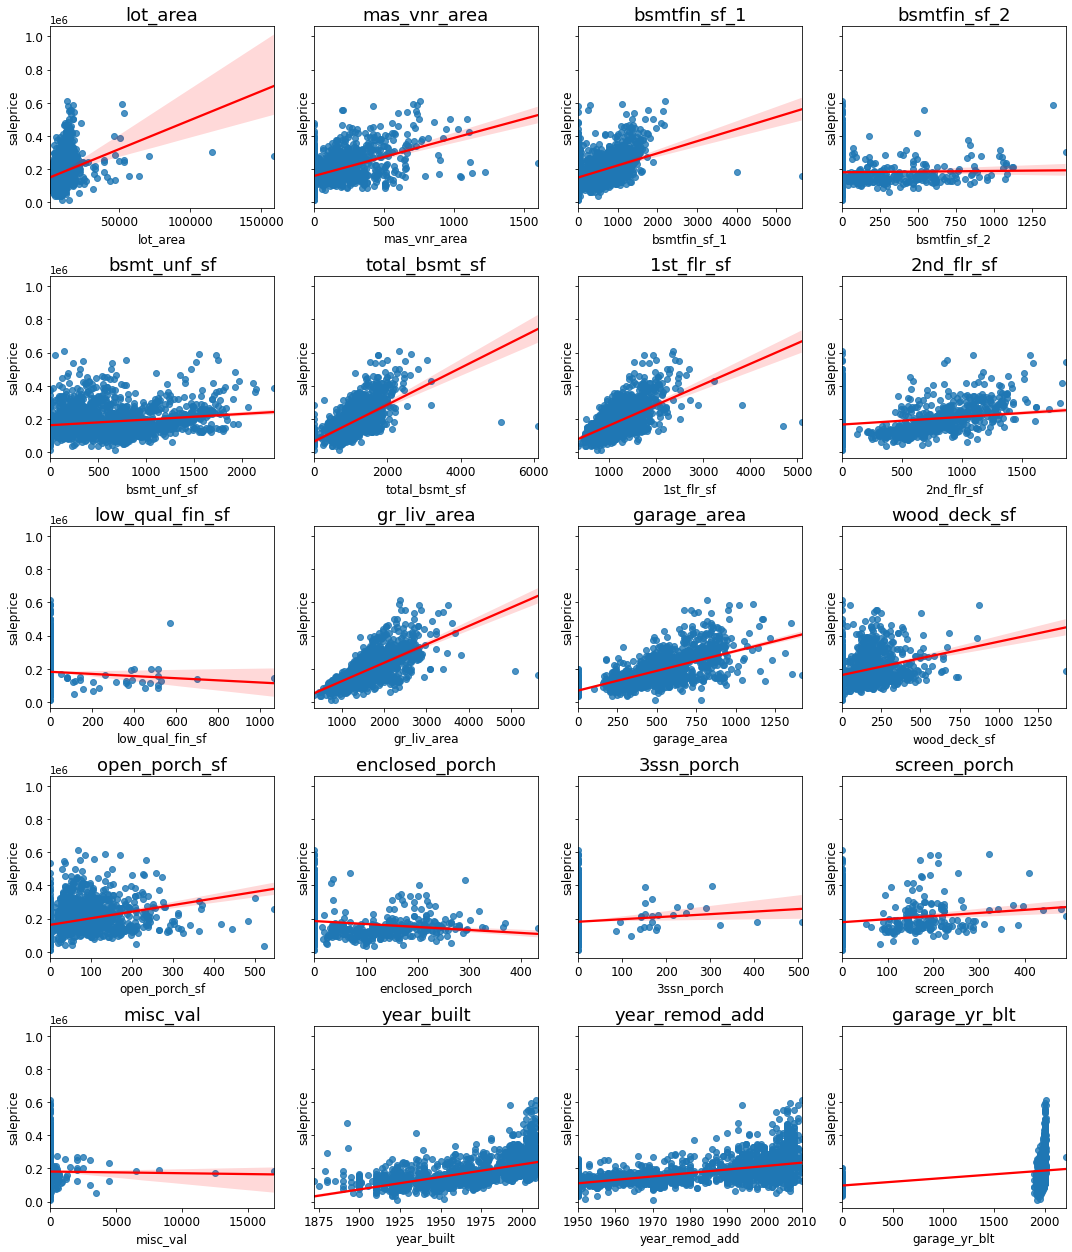

In [86]:
subplot_scatter(train, continuous_feat)

Based on the scatter plots, it appears that 'misc val' has a almost 0 correlation with sale prices and seems like a weak indicator for sale price. Additionally, it also appears to have a large number of 0 values. 

In [87]:
cont_drop = ['misc_val', 'low_qual_fin_sf', 'bsmtfin_sf_2']

There also seems to be an outlier for the 'garage_yr_blt' feature, where the year the garage built seemed to be quite ahead of time.

In [88]:
train.loc[train['garage_yr_blt'] > 2010, ['year_built', 'yr_sold', 'garage_yr_blt']]

,year_built,yr_sold,garage_yr_blt
1699,2006,2007,2207


In [89]:
same = len(train.loc[train['garage_yr_blt'] == train['year_built']])
same/2051 * 100

76.25548512920527

By inference it seems as if that this was an error in inputation, however, 76% of properties had their garages built the same year that the house was built, hence it is unwise to  predict the year the garage was built for index = 1699. Hence we will drop this row.

In [90]:
train.drop(index = 1699, inplace = True)

##### Categorical

For categorical data, we will explore the features using boxplots.

###### Nominal

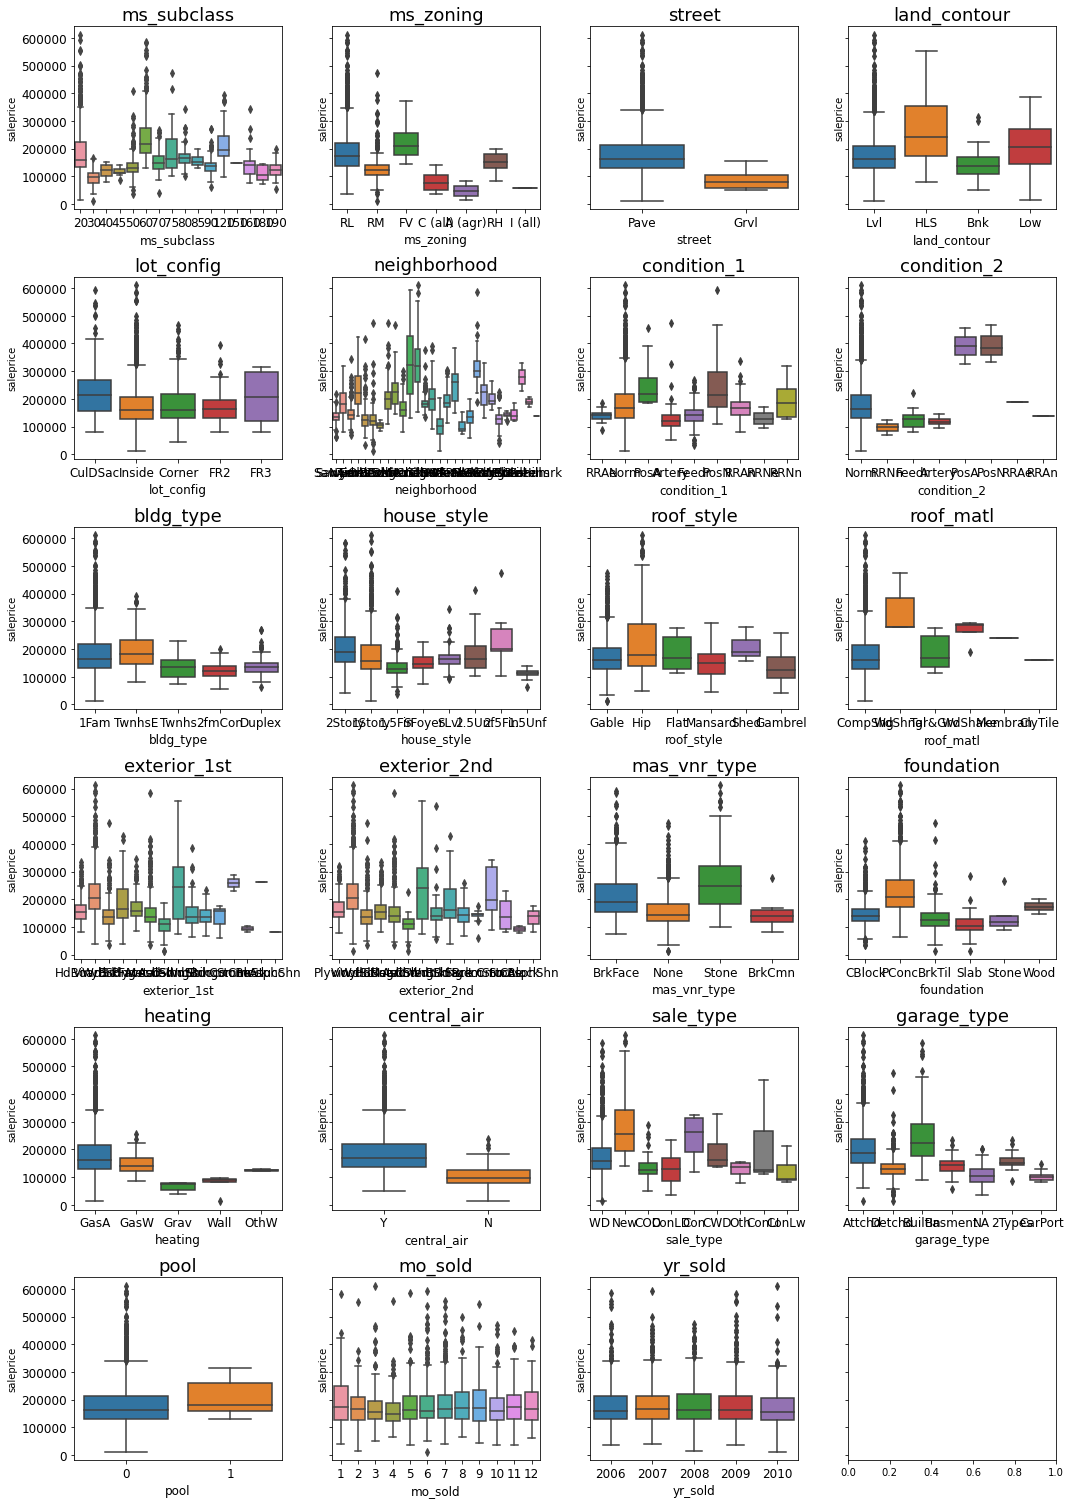

In [91]:
subplot_boxplot(train, nominal_feat)

There are a couple of features that are extremely skewed. We will drop these columns to prevent them from affecting our models later on. These are: 

1. street - highly skewed towards pave
2. roof_matl - highly skewed towards compshg
3. heating - highly skewed towards GasA
4. condition_1 - highly skewed towards Norm
5. condition_2 - highly skewed towards Norm

In [92]:
nom_drop = ['street', 'roof_matl', 'heating', 'condition_1', 'condition_2', 'central_air']

###### Ordinal

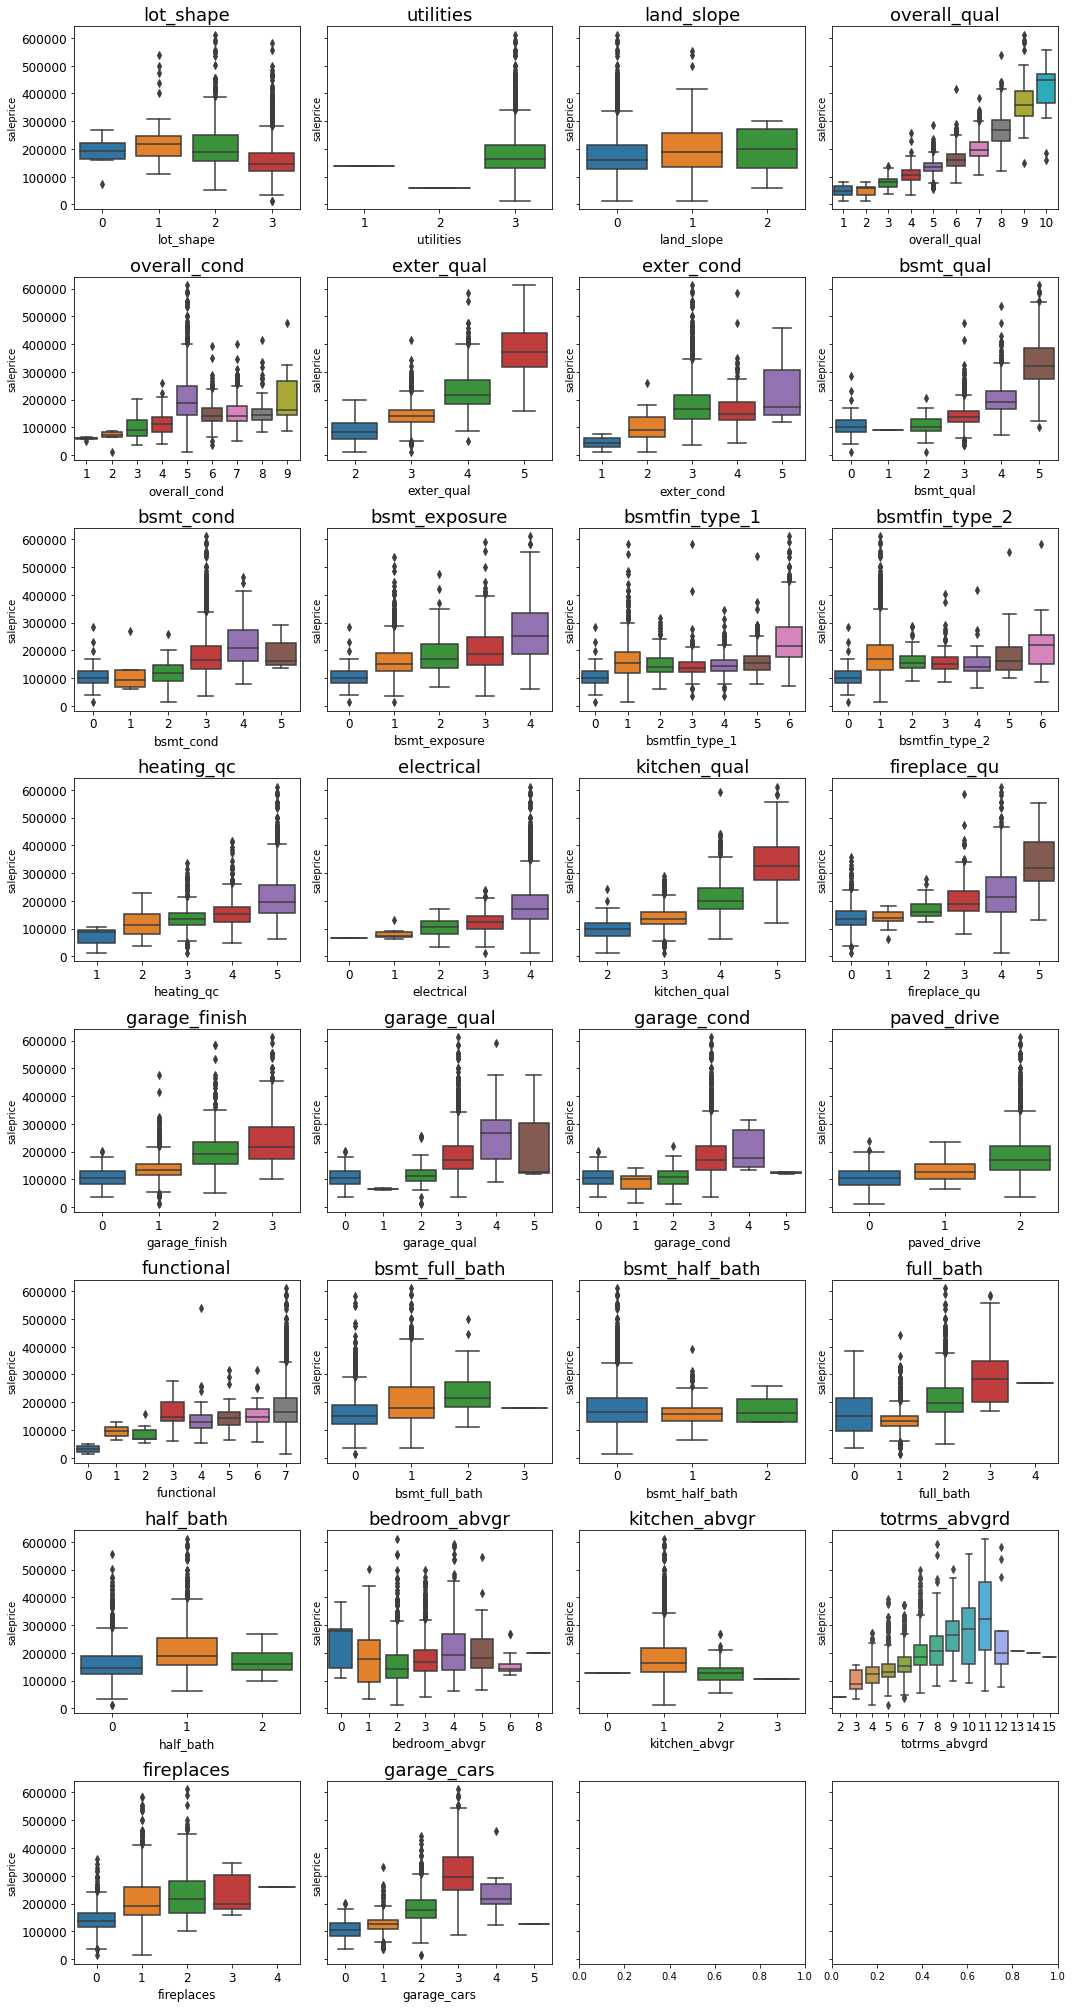

In [93]:
subplot_boxplot(train, ordinal_feat)

In [94]:
ord_drop = ['utilities', 'land_slope', 'functional', 'kitchen_abvgr', 'garage_qual', 'garage_cond', 'bsmtfin_type_2']

Drop features for both train and test datasets.

In [95]:
#train dataset
train.drop(columns = cont_drop, inplace = True)
train.drop(columns = nom_drop, inplace = True)
train.drop(columns = ord_drop, inplace = True)

#test dataset
test.drop(columns = cont_drop, inplace = True)
test.drop(columns = nom_drop, inplace = True)
test.drop(columns = ord_drop, inplace = True)

In [96]:
#update feature lists
ordinal_feat = [x for x in ordinal_feat if x not in ord_drop]
continuous_feat = [x for x in continuous_feat if x not in cont_drop]
nominal_feat = [x for x in nominal_feat if x not in nom_drop]

### Outliers

Based on the data dictionary, there are outliers in the training dataset. Let us try to understand these outliers and look at the scatter plot again.

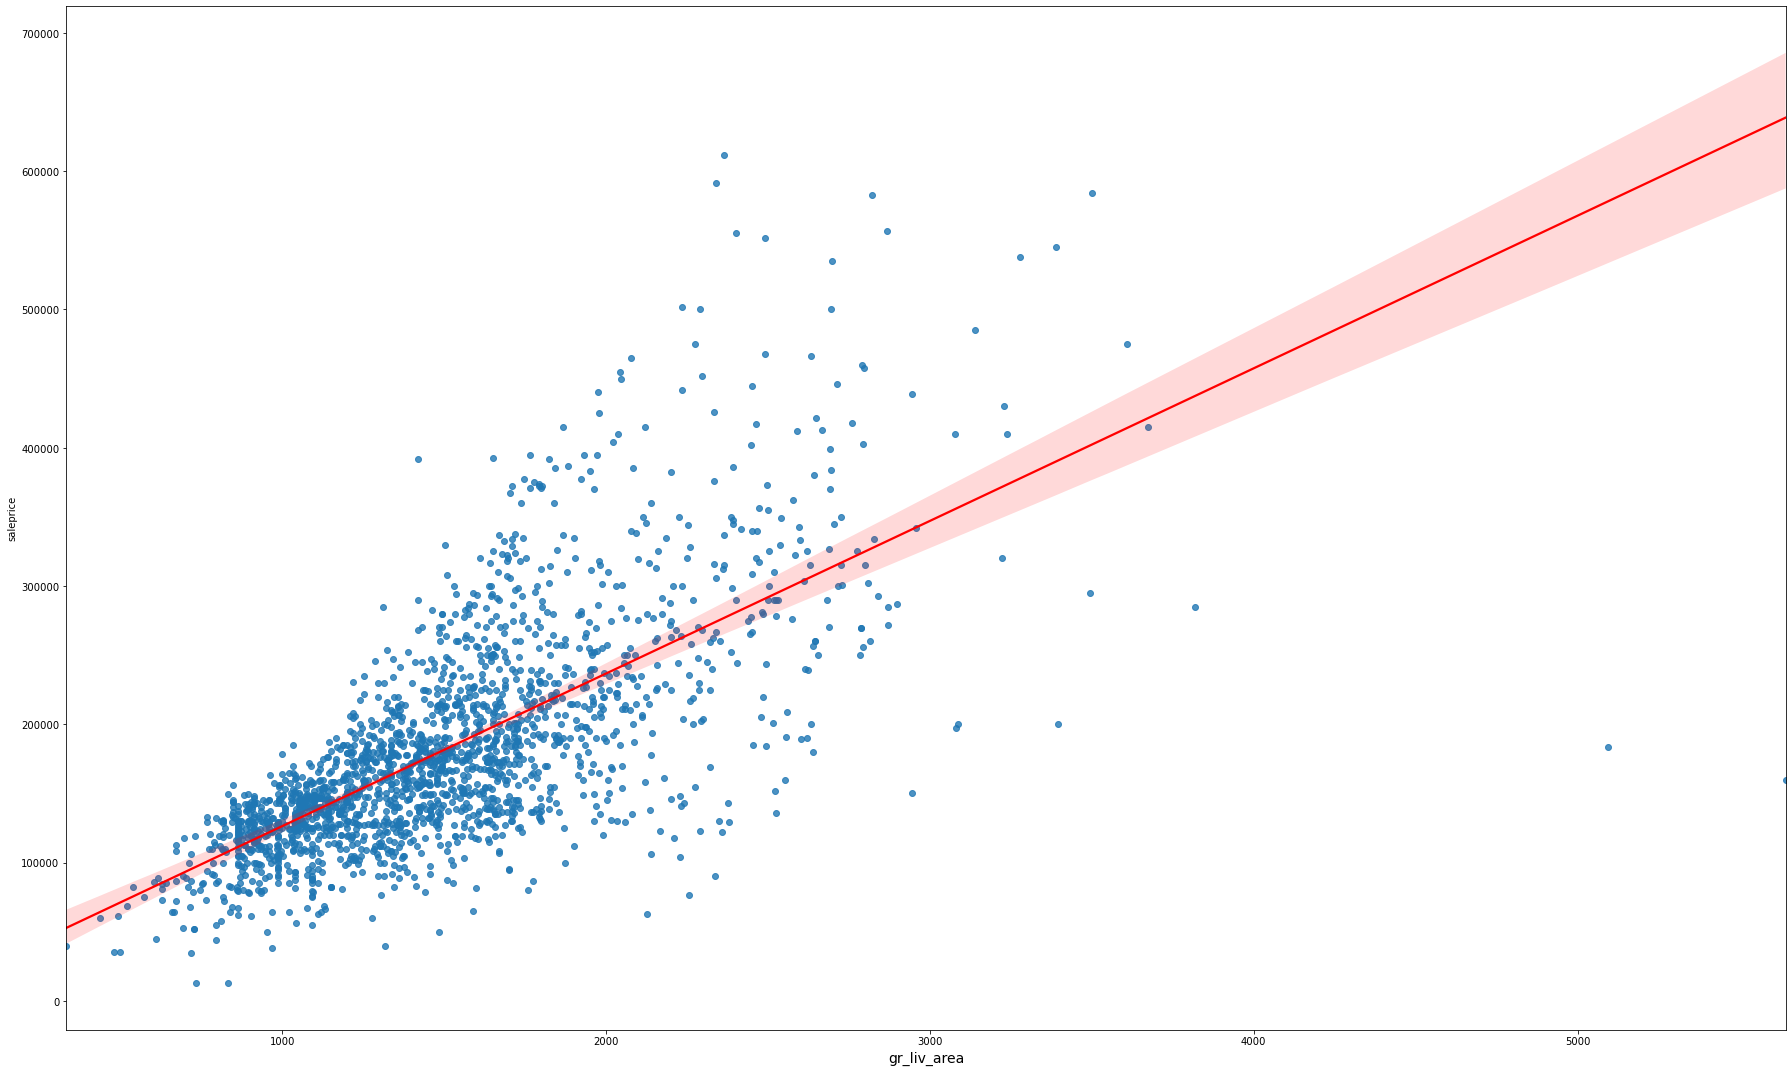

In [97]:
fig, ax = plt.subplots(figsize = (25,15))
reg = sns.regplot(x = 'gr_liv_area', y = 'saleprice', data = train, ax=ax,
                  line_kws={'color': 'red'})
reg.set_xlabel('gr_liv_area', fontsize = 14);
plt.tight_layout()

As we can see from the scatter plot, the outliers are indeed very far off from the other points in the dataset. Based on our EDA, we did not find any unusual behavior in our features that could have explained these unusual prices. Although outliers are very informative of a dataset, for this project we will remove the outliers as we do not not have enough information that could explain the unusual sale prices. Hence we will remove the outliers.

In [98]:
#remove outliers
train.drop(index=train.loc[train['gr_liv_area'] > 4000, :].index, inplace=True)

### MultiCollinearity and Interaction Terms

There are many features that can be classified together. We will fill look at the collinearity amongst all variables and then proceed to look through them in groups to see if we need to drop any features or create interaction terms to handle these features better.

###### Correlation

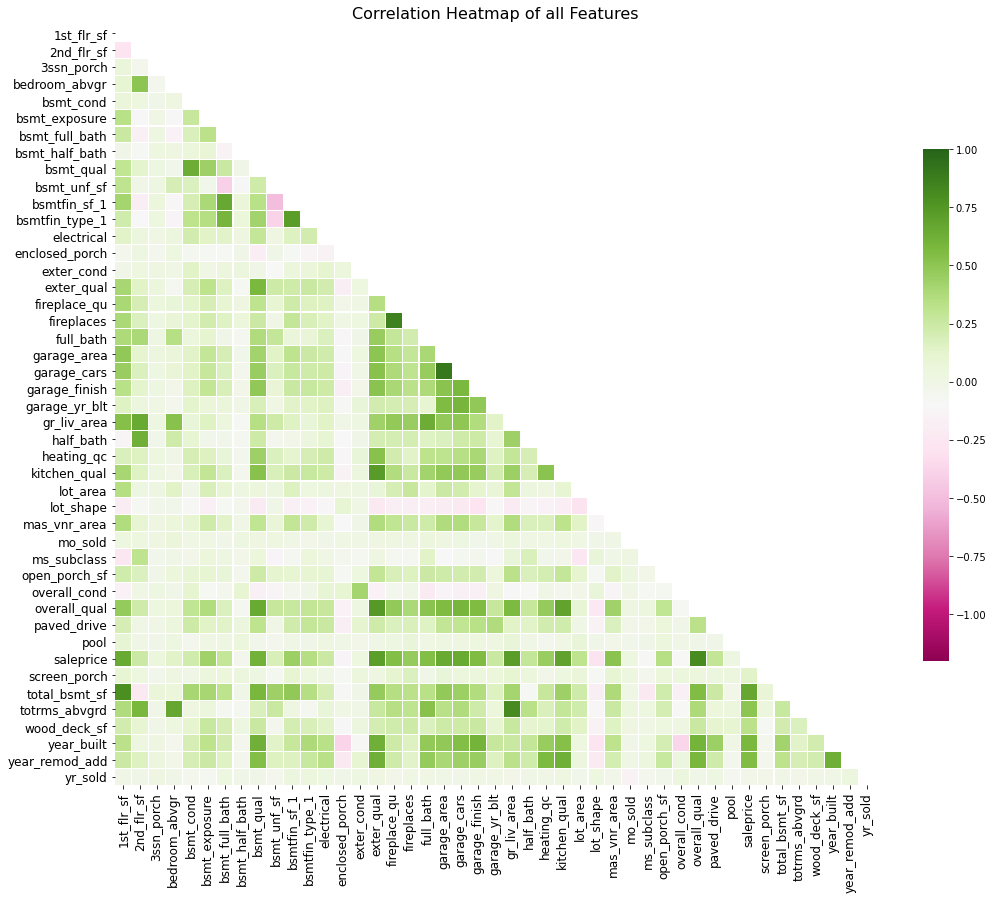

In [99]:
#sort columns 
df = train[train.columns.sort_values()]

# plot heatmap
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),  mask = mask, square=True, vmin = -1.2, vmax = 1, linewidth=0.1, cbar_kws = {'shrink':0.5},
           cmap = 'PiYG')
ax.tick_params(labelsize=12)
plt.tight_layout()

plt.title("Correlation Heatmap of all Features", fontsize = 16);

From the heatmap, we are able to identify features with strong collinearity.

1. 'garage_area' as a strong correlation with 'garage_cars' - the bigger the area, the higher number of cars can be stored

2. 'fireplaces' as a strong correlation with 'fireplaces_qu' - the higher the number of fireplaces, the greater the overall quality of all fireplaces

3. 'gr_liv_area' as a strong correlation with 'totrms_abvgrd' - the higher number of rooms above ground, the larger the area.

4. 'total_bsmt_sf' as a strong correlation with '1st_flr_sf' - the 1st floor should be directly above the basement, hence the strong correlation

5. There seems to be high collinearity between the garage type features.
Hence we will drop the following features:


'total_bsmt_sf'

'totrms_abvgrd'

'garage_cars'

'fireplace_qu'

In [100]:
corr_drop = ['total_bsmt_sf', 'totrms_abvgrd', 'garage_cars', 'fireplace_qu']

In [101]:
train.drop(columns = corr_drop, inplace = True)
test.drop(columns = corr_drop, inplace = True)

###### Porch Features

'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch' are four features that describe a porch. Let us understand their relationship further using a simple heatmap.

In [102]:
#create function to plot heatmap for specific columns
def plot_heatmap(df, cols, figsize = (15,15)):
    corr = df[cols].corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    
    fig, ax = plt.subplots(figsize = figsize)
    sns.heatmap(corr, mask = mask, annot = True, square = True, cmap= 'mako')
    ax.tick_params(labelsize=12)
    plt.tight_layout()

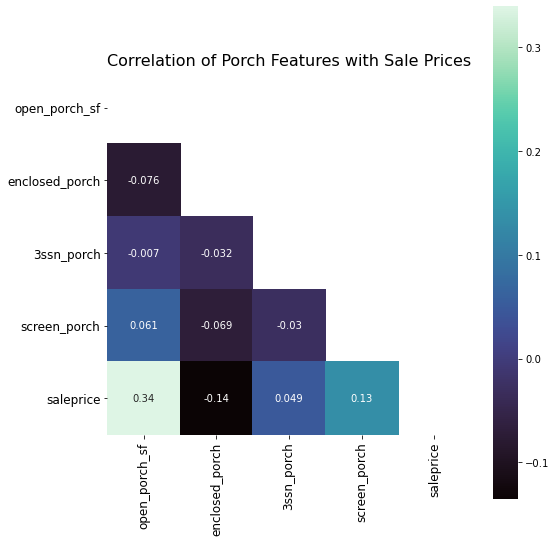

In [103]:
porch_hm = ['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'saleprice']
plot_heatmap(train, porch_hm, figsize = (8,8))
plt.title("Correlation of Porch Features with Sale Prices", fontsize = 16);

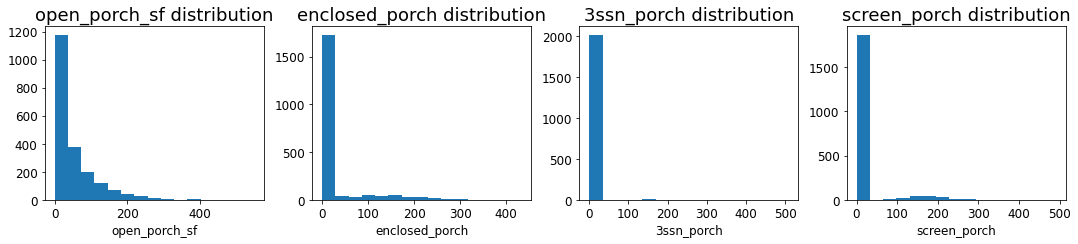

In [104]:
porchlist = ['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch']
subplot_hist(train, porchlist)

As seen in the heatmap, there seems to be a weak correlation amongst the porch features. Many properties also do not have porches, as seen in the histograms where majority of the points are skewed and tend towards 0. Hence we will combine these columns and classify properties on whether they have a porch or not.

In [105]:
#create new column that holds value of 1 if porch present, otherwise 0
train['porch'] = train[porchlist].sum(axis = 1).map(lambda x: 0 if x == 0 else 1)

In [106]:
train.drop(columns = porchlist, inplace = True)

###### year_built and yr_sold

We can minimise noise in our datasets by combining features such as year_built and yr_sold that can provide age of the house.

In [107]:
train['age'] = train['yr_sold'] - train['year_built']
train['age'] = train['age'].astype(int)

In [108]:
train.drop(columns = ['yr_sold', 'year_built'], inplace = True)

###### garage_yr_blt 

As garage_yr_blt does not provide much information and earlier, we have established 76% of properties having built their garages the same year as the properties, we will drop this column as well. This decision is also accompanied by the 114 null values and the strong collinearity with other garage type features.

In [109]:
train.drop(columns = 'garage_yr_blt', inplace = True)

Let us do the same for the test Dataset

In [110]:
test['porch'] = test[porchlist].sum(axis = 1).map(lambda x: 0 if x == 0 else 1)
test.drop(columns = porchlist, inplace = True)
test['age'] = test['yr_sold'] - test['year_built'] 
test.drop(columns = ['yr_sold', 'year_built', 'garage_yr_blt'], inplace = True)

test['age'] = test['age'].astype(int)

Update feature list

In [111]:
ordinal_feat.remove('totrms_abvgrd')
ordinal_feat.remove('garage_cars')
ordinal_feat.remove('fireplace_qu')

In [112]:
continuous_feat.remove('open_porch_sf')
continuous_feat.remove('enclosed_porch')
continuous_feat.remove('3ssn_porch')
continuous_feat.remove('year_built')
continuous_feat.remove('garage_yr_blt')
continuous_feat.remove('total_bsmt_sf')
continuous_feat.remove('screen_porch')
continuous_feat.append('age')

In [113]:
nominal_feat.remove('yr_sold')
nominal_feat.append('porch')

In [114]:
train.shape

(2048, 49)

In [115]:
continuous_feat

['lot_area',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmt_unf_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'gr_liv_area',
 'garage_area',
 'wood_deck_sf',
 'year_remod_add',
 'age']

In [116]:
ordinal_feat

['lot_shape',
 'overall_qual',
 'overall_cond',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'heating_qc',
 'electrical',
 'kitchen_qual',
 'garage_finish',
 'paved_drive',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'fireplaces']

In [117]:
nominal_feat

['ms_subclass',
 'ms_zoning',
 'land_contour',
 'lot_config',
 'neighborhood',
 'bldg_type',
 'house_style',
 'roof_style',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'sale_type',
 'garage_type',
 'pool',
 'mo_sold',
 'porch']

### Summary of Removed Features

The following provides a list of features that were dropped.

Columns Dropped:

- pool_qc
- pool_area
- alley
- fence
- misc_feature
- lot_frontage
- id
- pid
- misc_val
- low_qual_fin_sf
- bsmtfin_sf_2
- street
- roof_matl
- heating
- condition_1
- condition_2
- central_air
- open_porch_sf
- enclosed_porch 
- 3ssn_porch 
- screen_porch
- yr_sold
- year_built
- garage_yr_blt


Columns Amended/Added:

- pool
- porch
- age


Outliers Handled (for Train Dataset only):

- gr_liv_area
- garage_yr_blt


High Collinearity (Dropped):

- total_bsmt_sf
- totrms_abvgrd
- garage_cars
- fireplaces_qu


Export cleaned data.

In [118]:
train.to_csv('./data/train_cleaned.csv', index=False)
test.to_csv('./data/test_cleaned.csv', index=False)